In [1]:
# import net3d_3_v11_1 as n3
import net3d_3_v10_8 as n3

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
get_link_thickness_threshold = lambda N,L: N**(1./3)/L**(1./2)

In [8]:
n, m = 300, 1000

pts = 10*rand(n,3)
edg = randint(0,n,size=(m,2))
d = pd.DataFrame(arange(n))
d.to_csv('./node-labels-test.csv',header=True,index=False)
d = pd.DataFrame(pts)
d.to_csv('./node-positions-test.csv',header=True,index=False)
d = pd.DataFrame(edg)
d.to_csv('./link-test.csv',header=True,index=False)
get_link_thickness_threshold(n,m)

0.21169328630254583

In [4]:
node_positions = pd.read_csv('./node-positions-test.csv').values
node_labels =[str(i) for i in  list(pd.read_csv('./node-labels-test.csv').values.flatten())]

edgelist = pd.read_csv('./link-test.csv').values

In [5]:
node_radius = 1.
threshold = node_radius * get_link_thickness_threshold(len(node_labels), len(edgelist))
threshold

0.21169328630254583

In [8]:
params = {
    'links':
           {'k':10, # spring constant for links (increase if links don't contract well (not becoming straight enough), decrease if links cross a lot)
            'amplitude':500, # strength of link repulsion (if many crossings ==> increase, decrease if layout explodes ) 
            'thickness':.5 * threshold, # thickness of links
            'Temp0':.5, 'ce':100, # noise parameters, if too noisy, set 'Temp0':0
            'segs':15, # # segments along link, increase if too many crossing, decrease if simulation is slow or memory error 
           'weighted': False},
    'nodes':
           {
               'amplitude' : 500, # repulsion for nodes
               'radius': node_radius, # node size (only used if 'networkBase(...,fixed=False,...)' )
               'weighted':True, # weighted by degree 
               'labels': node_labels,
           },
          }

##
# Node positions:
# x1, y1, z1
# x2, y2, z2

nn = n3.networkBase(pts = node_positions, edg= edgelist, max_workers= 100,
                    fixed=True, # fixed: (True: nodes are fixed), (false: nodes can move)
                    **params)

dt(s) = 0.422
Making links...
single thickness? Adapting to edge segments...
single k? Adapting to edge segments...
making 20 workers for external force calculations...
dt(s) = 2.27
Making nodes...
dt(s) = 7.13
initializing global variables...
dt(s) = 0.249
Initial binning...
^10 0 v5 3052 ^10 749 v5 3029 v10 747 0 |ct:0.5 dt(s) = 0.278
setup: dt...
dt(s) = 0.00466
setup: volume...
dt(s) = 0.00635
setup: dynamics...
dt(s) = 0.000694
setup: dynamics 2...
dt(s) = 0.000875
Done!


v5 2831 v10 744 ^20 140 v10 712 ^20 121 ^5 [=] 38 ^5 [=] 45 ^5 [=] 54 ^5 [=] 50 ^5 [=] 45 45 |ct:0.5 v10 722 ^20 139 v10 723 ^20 146 v10 726 ^5 [=] 52 ^5 [=] 43 ^5 [=] 36 ^5 [=] 48 ^5 [=] 43 86 |ct:0.5 ^20 166 v10 740 ^20 155 v10 732 ^20 124 ^5 [=] 43 ^5 [=] 50 ^5 [=] 48 ^5 [=] 41 ^5 [=] 46 126 |ct:0.5 v10 754 ^20 161 v10 752 ^20 169 v10 755 ^5 [=] 38 ^5 [=] 47 ^5 [=] 53 ^5 [=] 53 ^5 [=] 41 168 |ct:0.5 dt(s) = 95.4


/home/nidami/tf3_gpu/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


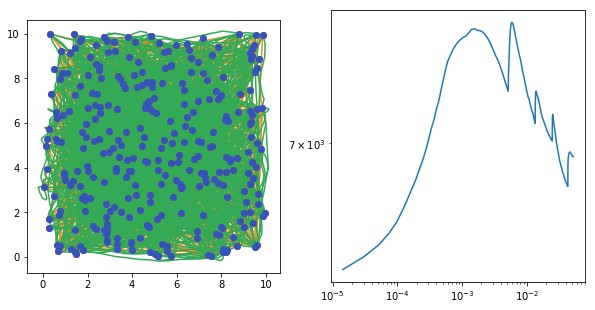

Beginning convergence check ...
^20 126 v10 773 ^20 147 v10 773 ^20 146 ^5 [=] 36 ^5 [=] 52 ^5 [=] 42 ^5 [=] 47 ^5 [=] 43 208 |ct:0.35 v10 755 ^20 138 v10 766 ^20 153 v10 773 ^5 [=] 46 ^5 [=] 53 ^5 [=] 42 ^5 [=] 47 ^5 [=] 46 249 |ct:2.4 ^20 146 v10 804 ^20 155 v10 781 ^20 157 ^5 [=] 51 ^5 [=] 42 ^5 [=] 43 ^5 [=] 42 ^5 [=] 37 290 |ct:3.1 v10 798 ^20 164 v10 790 ^20 153 v10 767 ^5 [=] 46 ^5 [=] 46 ^5 [=] 35 ^5 [=] 43 ^5 [=] 50 331 |ct:3.9 ^20 136 v10 800 ^20 148 v10 821 ^20 153 ^5 [=] 47 ^5 [=] 51 ^5 [=] 50 ^5 [=] 38 ^5 [=] 40 371 |ct:3.7 dt(s) = 49.1


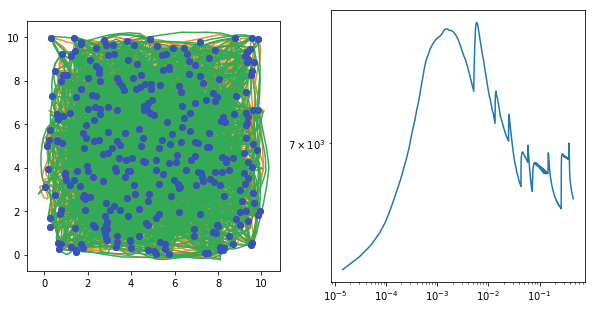


400) ct=3.7, E-ELF-sim Has Not Converged! dlog<l>/dlog(t)~0.0729 
Checks: (False, False, True)
v10 812 ^20 157 v10 786 ^20 160 v10 784 ^5 [=] 42 ^5 [=] 44 ^5 [=] 53 ^5 [=] 42 ^5 [=] 37 412 |ct:3.8 ^20 154 v10 807 ^20 161 v10 814 ^20 168 ^5 [=] 46 ^5 [=] 37 ^5 [=] 51 ^5 [=] 53 ^5 [=] 55 453 |ct:1.6 v10 826 ^20 167 v10 782 ^20 131 v10 804 ^5 [=] 46 ^5 [=] 45 ^5 [=] 46 ^5 [=] 29 ^5 [=] 51 494 |ct:1.8 ^20 145 v10 802 ^20 167 v10 823 ^20 158 ^5 [=] 42 ^5 [=] 55 ^5 [=] 44 ^5 [=] 37 ^5 [=] 53 535 |ct:2.3 v10 810 ^20 151 v10 793 ^20 154 v10 803 ^5 [=] 45 ^5 [=] 48 ^5 [=] 48 ^5 [=] 50 ^5 [=] 52 576 |ct:2.2 dt(s) = 44.4


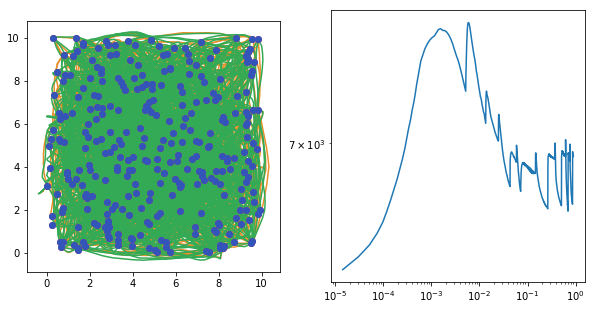


600) ct=2.2, E-ELF-sim Has Not Converged! dlog<l>/dlog(t)~0.261 
Checks: (False, False, True)
^20 134 v10 823 ^20 141 v10 832 ^20 175 ^5 [=] 50 ^5 [=] 51 ^5 [=] 56 ^5 [=] 56 ^5 [=] 52 617 |ct:1.8 

KeyboardInterrupt: 

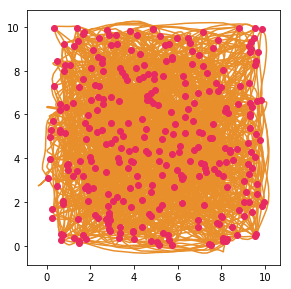

In [18]:
c0 = 0.5#0.05
tol = c0/5
n3.iter_converge(nn,
                 max_its = 60000, # maximum iterations
                 its = 200, # # of iterations before plotting and checking convergence conditions
                 c0 = c0, # 0.5, decrease if too many fluctuations in plot maybe to c0=.1 , increse if too slow, but not more than c0=1 
                 tol = tol, # threshold for convergence check. increase if it doesn't converge soon enough, but not more than c0
                 ellipsoid = 0 # set to true to resolve broken links 
                )

In [79]:
nn.gnam = 'net_name'
nn.save('./')

# Free nodes

In [6]:
params = {
    'links':
           {'k':10, # spring constant for links (increase if links don't contract well (not becoming straight enough), decrease if links cross a lot)
            'amplitude':500, # strength of link repulsion (if many crossings ==> increase, decrease if layout explodes ) 
            'thickness':5 * threshold, # thickness of links
            'Temp0':.5, 'ce':100, # noise parameters, if too noisy, set 'Temp0':0
            'segs':15, # # segments along link, increase if too many crossing, decrease if simulation is slow or memory error 
            'max_workers':100,
            'weighted': False},
    'nodes':
           {
               'amplitude' : 500, # repulsion for nodes
               'radius': node_radius, # node size (only used if 'networkBase(...,fixed=False,...)' )
               'weighted':True, # weighted by degree 
               'labels': node_labels,
           },
          }

##
# Node positions:
# x1, y1, z1
# x2, y2, z2

nn = n3.networkBase(pts = node_positions, edg= edgelist, max_workers = 100,
#                     keep_paths=False, # if loading from JSON, option to keep link trajectories
                    fixed=False, # fixed: (True: nodes are fixed), (false: nodes can move)
                    
                    **params)

dt(s) = 0.424
Making links...
single thickness? Adapting to edge segments...
single k? Adapting to edge segments...
making 100 workers for external force calculations...
dt(s) = 10.6
Making nodes...
dt(s) = 7.18
initializing global variables...
dt(s) = 0.538
Initial binning...
^10 0 ^5 [=] 45 ^5 [=] 60 ^5 [=] 42 ^5 [=] 59 0 |ct:0.5 dt(s) = 0.451
setup: dt...
dt(s) = 0.00595
setup: volume...
dt(s) = 0.00579
setup: dynamics...
dt(s) = 0.000727
setup: dynamics 2...
dt(s) = 0.000942
Done!


^5 [=] 57 ^5 [=] 86 ^5 [=] 80 ^5 [=] 81 ^5 [=] 74 ^5 [=] 40 ^5 [=] 28 ^5 [=] 28 ^5 [=] 26 ^5 [=] 28 40 |ct:0.5 ^5 [=] 76 ^5 [=] 135 ^5 [=] 128 ^5 [=] 135 ^5 [=] 132 ^5 [=] 29 ^5 [=] 26 ^5 [=] 26 ^5 [=] 28 ^5 [=] 25 81 |ct:0.5 ^5 [=] 133 ^5 [=] 165 ^5 [=] 165 ^5 [=] 162 ^5 [=] 167 ^5 [=] 28 ^5 [=] 27 ^5 [=] 24 ^5 [=] 25 ^5 [=] 25 122 |ct:0.5 ^5 [=] 166 ^5 [=] 191 ^5 [=] 188 ^5 [=] 188 ^5 [=] 189 ^5 [=] 25 ^5 [=] 26 ^5 [=] 28 ^5 [=] 24 ^5 [=] 27 162 |ct:0.5 dt(s) = 34.1


/home/nidami/tf3_gpu/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


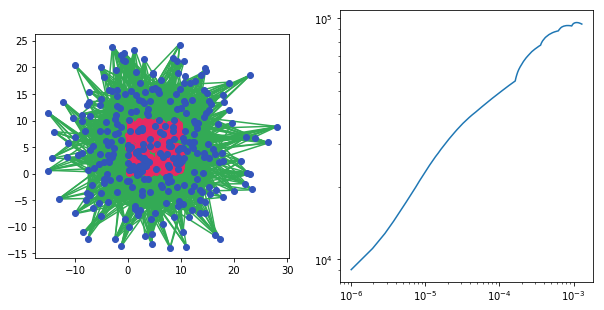

Beginning convergence check ...
^5 [=] 196 ^5 [=] 217 ^5 [=] 199 ^5 [=] 208 ^5 [=] 207 ^5 [=] 26 ^5 [=] 24 ^5 [=] 26 ^5 [=] 26 ^5 [=] 26 202 |ct:0.28 ^5 [=] 202 ^5 [=] 220 ^5 [=] 216 ^5 [=] 218 ^5 [=] 218 ^5 [=] 25 ^5 [=] 29 ^5 [=] 27 ^5 [=] 26 ^5 [=] 25 243 |ct:0.53 ^5 [=] 221 ^5 [=] 223 ^5 [=] 231 ^5 [=] 224 ^5 [=] 229 ^5 [=] 25 ^5 [=] 28 ^5 [=] 25 ^5 [=] 28 ^5 [=] 26 283 |ct:1.2 ^5 [=] 219 ^5 [=] 208 ^5 [=] 222 ^5 [=] 210 ^5 [=] 208 ^5 [=] 26 ^5 [=] 21 ^5 [=] 24 ^5 [=] 22 ^5 [=] 26 323 |ct:0.85 ^5 [=] 214 ^5 [=] 247 ^5 [=] 247 ^5 [=] 244 ^5 [=] 251 ^5 [=] 22 ^5 [=] 26 ^5 [=] 28 ^5 [=] 30 ^5 [=] 29 363 |ct:0.57 dt(s) = 32.4


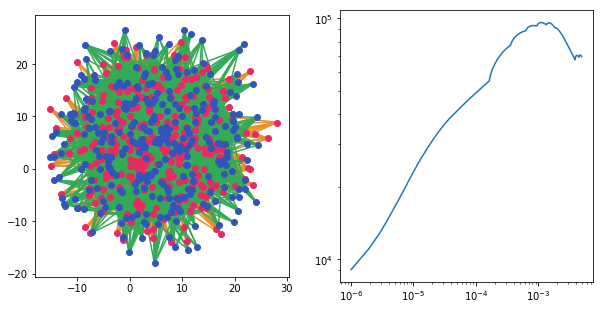


400) ct=0.57, E-ELF-sim Has Not Converged! dlog<l>/dlog(t)~0.164 
Checks: (False, False, True)
^5 [=] 251 ^5 [=] 265 ^5 [=] 270 ^5 [=] 264 ^5 [=] 257 ^5 [=] 26 ^5 [=] 33 ^5 [=] 28 ^5 [=] 26 ^5 [=] 25 403 |ct:0.63 ^5 [=] 253 ^5 [=] 274 ^5 [=] 272 ^5 [=] 281 ^5 [=] 279 ^5 [=] 29 ^5 [=] 26 ^5 [=] 24 ^5 [=] 24 ^5 [=] 28 444 |ct:0.6 ^5 [=] 278 ^5 [=] 278 ^5 [=] 288 ^5 [=] 295 ^5 [=] 292 ^5 [=] 25 ^5 [=] 24 ^5 [=] 22 ^5 [=] 25 ^5 [=] 22 484 |ct:0.86 ^5 [=] 281 ^5 [=] 301 ^5 [=] 303 ^5 [=] 306 ^5 [=] 315 ^5 [=] 24 ^5 [=] 25 ^5 [=] 26 ^5 [=] 27 ^5 [=] 27 525 |ct:0.82 ^5 [=] 310 ^5 [=] 316 ^5 [=] 316 ^5 [=] 316 ^5 [=] 315 ^5 [=] 24 ^5 [=] 25 ^5 [=] 26 ^5 [=] 26 ^5 [=] 24 565 |ct:1.8 dt(s) = 39.2


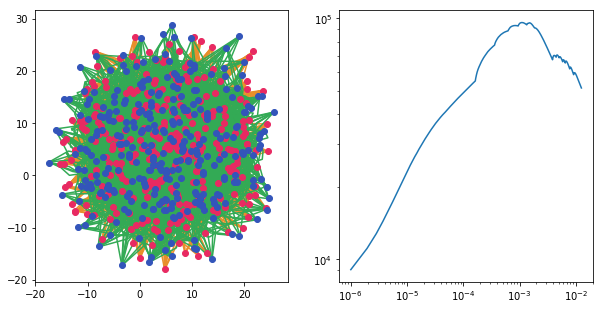


600) ct=1.8, E-ELF-sim Has Not Converged! dlog<l>/dlog(t)~0.139 
Checks: (False, False, True)
^5 [=] 312 ^5 [=] 332 ^5 [=] 333 ^5 [=] 334 ^5 [=] 326 ^5 [=] 24 ^5 [=] 27 ^5 [=] 25 ^5 [=] 24 ^5 [=] 32 605 |ct:1.5 ^5 [=] 322 ^5 [=] 350 ^5 [=] 357 ^5 [=] 353 ^5 [=] 360 ^5 [=] 28 ^5 [=] 27 ^5 [=] 30 ^5 [=] 30 ^5 [=] 28 646 |ct:0.82 ^5 [=] 351 ^5 [=] 373 ^5 [=] 376 ^5 [=] 377 ^5 [=] 375 ^5 [=] 32 ^5 [=] 28 ^5 [=] 28 ^5 [=] 29 ^5 [=] 33 687 |ct:3.1 ^5 [=] 378 ^5 [=] 399 ^5 [=] 403 ^5 [=] 410 ^5 [=] 408 ^5 [=] 27 ^5 [=] 27 ^5 [=] 25 ^5 [=] 24 ^5 [=] 24 728 |ct:0.97 ^5 [=] 402 ^5 [=] 452 ^5 [=] 445 ^5 [=] 445 ^5 [=] 449 ^5 [=] 25 ^5 [=] 29 ^5 [=] 29 ^5 [=] 26 ^5 [=] 25 769 |ct:1.4 dt(s) = 46.1


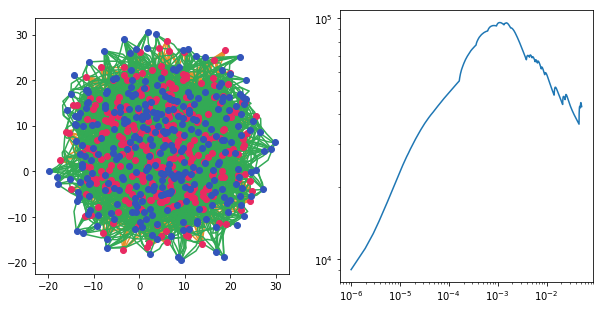


800) ct=1.4, E-ELF-sim Has Not Converged! dlog<l>/dlog(t)~1.04 
Checks: (False, False, True)
^5 [=] 446 ^5 [=] 458 ^5 [=] 466 ^5 [=] 465 ^5 [=] 470 ^5 [=] 27 ^5 [=] 27 ^5 [=] 30 ^5 [=] 26 ^5 [=] 26 809 |ct:0.037 ^5 [=] 460 ^5 [=] 461 ^5 [=] 476 ^5 [=] 461 ^5 [=] 462 ^5 [=] 28 ^5 [=] 32 ^5 [=] 29 ^5 [=] 26 ^5 [=] 27 850 |ct:5.4 ^5 [=] 459 ^5 [=] 470 ^5 [=] 469 ^5 [=] 487 ^5 [=] 473 ^5 [=] 28 ^5 [=] 26 ^5 [=] 28 ^5 [=] 29 ^5 [=] 27 891 |ct:1.8 ^5 [=] 470 v5 526 ^10 106 ^5 [=] 24 ^5 [=] 25 ^5 [=] 22 ^5 [=] 23 ^5 [=] 23 932 |ct:0.3 v5 526 ^10 112 v5 560 ^10 114 v5 544 ^5 [=] 23 ^5 [=] 23 ^5 [=] 23 ^5 [=] 23 ^5 [=] 31 973 |ct:0.77 dt(s) = 54.3


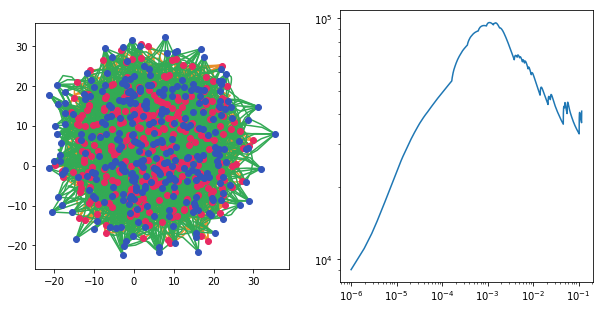


1000) ct=0.77, E-ELF-sim Has Not Converged! dlog<l>/dlog(t)~2.41 
Checks: (False, False, True)
^10 117 v5 565 ^10 119 v5 563 ^10 112 ^5 [=] 25 ^5 [=] 27 ^5 [=] 27 ^5 [=] 32 ^5 [=] 26 1014 |ct:0.83 v5 573 ^10 114 v5 585 ^10 116 v5 586 ^5 [=] 27 ^5 [=] 28 ^5 [=] 29 ^5 [=] 29 ^5 [=] 32 1055 |ct:0.036 ^10 117 v5 592 ^10 116 v5 582 ^10 118 ^5 [=] 29 ^5 [=] 26 ^5 [=] 27 ^5 [=] 25 ^5 [=] 26 1095 |ct:0.71 v5 597 ^10 121 v5 604 ^10 118 v5 597 ^5 [=] 27 ^5 [=] 29 ^5 [=] 26 ^5 [=] 31 ^5 [=] 25 1136 |ct:1.8 ^10 121 v5 657 ^10 126 v5 651 ^10 130 ^5 [=] 30 ^5 [=] 27 ^5 [=] 27 ^5 [=] 32 ^5 [=] 28 1176 |ct:2.5 dt(s) = 50.1


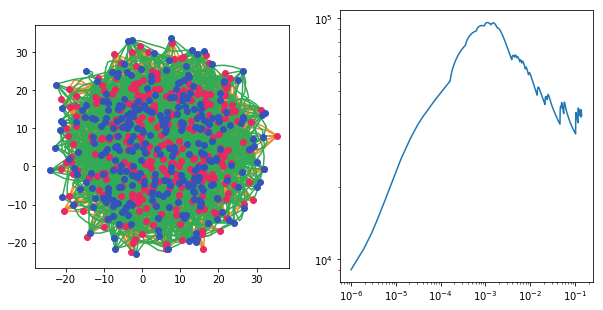


1200) ct=2.5, E-ELF-sim Has Not Converged! dlog<l>/dlog(t)~1.12 
Checks: (False, False, True)
v5 648 ^10 131 v5 656 ^10 126 v5 658 ^5 [=] 26 ^5 [=] 32 ^5 [=] 28 ^5 [=] 30 ^5 [=] 28 1217 |ct:3 ^10 127 v5 722 ^10 142 v5 731 ^10 144 ^5 [=] 29 ^5 [=] 29 ^5 [=] 26 ^5 [=] 28 ^5 [=] 29 1258 |ct:1.5 v5 736 ^10 144 v5 731 ^10 141 v5 732 ^5 [=] 28 ^5 [=] 33 ^5 [=] 27 ^5 [=] 34 ^5 [=] 30 1300 |ct:0.98 ^10 141 v5 776 ^10 145 v5 773 ^10 149 ^5 [=] 33 ^5 [=] 29 ^5 [=] 29 ^5 [=] 27 ^5 [=] 28 1341 |ct:2.3 v5 777 ^10 146 v5 769 ^10 142 v5 775 ^5 [=] 27 ^5 [=] 27 ^5 [=] 26 ^5 [=] 26 ^5 [=] 27 1382 |ct:1.7 dt(s) = 56.8


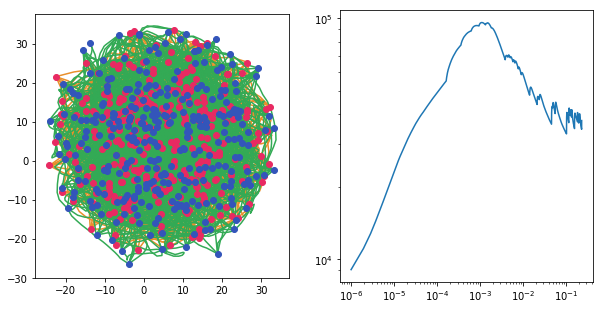


1400) ct=1.7, E-ELF-sim Has Not Converged! dlog<l>/dlog(t)~1.24 
Checks: (False, False, True)
^10 145 v5 812 ^10 160 v5 812 ^10 155 ^5 [=] 27 ^5 [=] 31 ^5 [=] 31 ^5 [=] 32 ^5 [=] 27 1422 |ct:0.94 v5 814 ^10 161 v5 846 ^10 157 v5 830 ^5 [=] 27 ^5 [=] 30 ^5 [=] 29 ^5 [=] 30 ^5 [=] 35 1464 |ct:1.2 ^10 159 v5 859 ^10 158 v5 869 ^10 167 ^5 [=] 32 ^5 [=] 27 ^5 [=] 31 ^5 [=] 30 ^5 [=] 27 1505 |ct:3.1 v5 876 ^10 157 v5 839 ^10 157 v5 827 ^5 [=] 29 ^5 [=] 30 ^5 [=] 29 ^5 [=] 30 ^5 [=] 29 1546 |ct:1.9 ^10 162 v5 888 ^10 172 v5 895 ^10 162 ^5 [=] 28 ^5 [=] 28 ^5 [=] 32 ^5 [=] 29 ^5 [=] 31 1587 |ct:0.56 dt(s) = 57.6


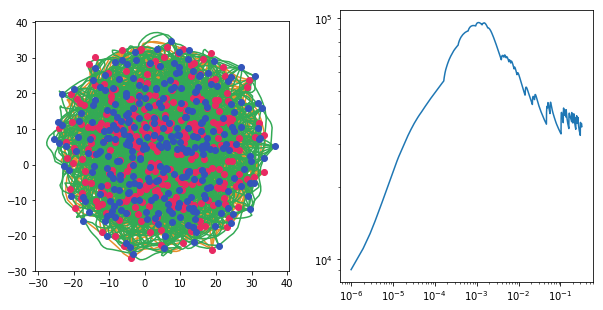


1600) ct=0.56, E-ELF-sim Has Not Converged! dlog<l>/dlog(t)~1.09 
Checks: (False, False, True)
v5 897 ^10 167 v5 892 ^10 171 v5 900 ^5 [=] 30 ^5 [=] 33 ^5 [=] 30 ^5 [=] 33 ^5 [=] 28 1629 |ct:2 ^10 173 v5 929 ^10 175 v5 930 ^10 176 ^5 [=] 30 ^5 [=] 33 ^5 [=] 32 ^5 [=] 33 ^5 [=] 33 1670 |ct:1.9 v5 931 ^10 167 v5 896 ^10 167 v5 902 ^5 [=] 32 ^5 [=] 28 ^5 [=] 30 ^5 [=] 28 ^5 [=] 28 1712 |ct:1.3 ^10 181 v5 959 ^10 171 v5 955 ^10 186 ^5 [=] 30 ^5 [=] 34 ^5 [=] 32 ^5 [=] 32 ^5 [=] 35 1753 |ct:3.3 v5 953 ^10 169 v5 901 ^10 171 v5 908 ^5 [=] 31 ^5 [=] 27 ^5 [=] 31 ^5 [=] 29 ^5 [=] 30 1794 |ct:2.6 dt(s) = 69.9


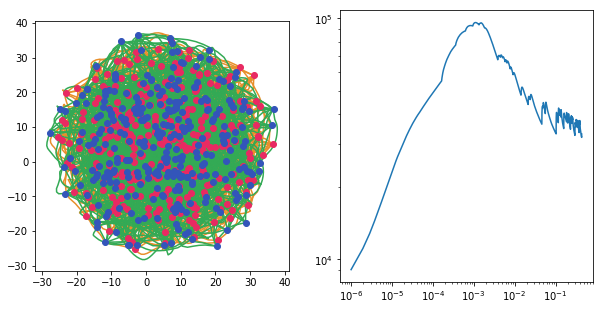


1800) ct=2.6, E-ELF-sim Has Not Converged! dlog<l>/dlog(t)~1.01 
Checks: (False, False, True)
^10 175 v5 966 ^10 183 v5 953 ^10 186 ^5 [=] 29 ^5 [=] 29 ^5 [=] 31 ^5 [=] 30 ^5 [=] 30 1835 |ct:2.6 v5 956 ^10 175 v5 916 ^10 177 v5 917 ^5 [=] 31 ^5 [=] 30 ^5 [=] 34 ^5 [=] 26 ^5 [=] 27 1877 |ct:0.51 ^10 176 v5 954 ^10 171 v5 951 ^10 178 ^5 [=] 27 ^5 [=] 31 ^5 [=] 32 ^5 [=] 34 ^5 [=] 29 1919 |ct:1.7 v5 958 ^10 179 v5 931 ^10 179 v5 935 ^5 [=] 35 ^5 [=] 31 ^5 [=] 33 ^5 [=] 29 ^5 [=] 34 1960 |ct:3.7 dt(s) = 59.8


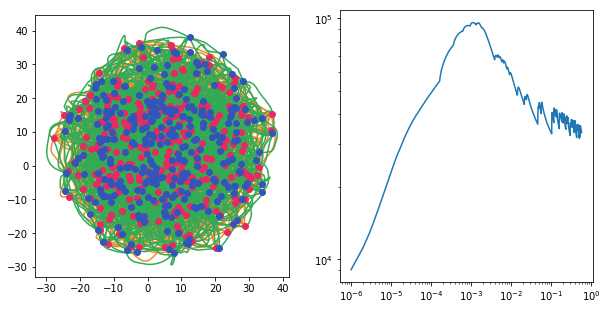


2000) ct=3.7, E-ELF-sim Has Not Converged! dlog<l>/dlog(t)~1.16 
Checks: (False, False, True)
^10 177 v5 988 ^10 185 v5 985 ^10 187 ^5 [=] 30 ^5 [=] 32 ^5 [=] 31 ^5 [=] 33 ^5 [=] 33 2002 |ct:2.1 v5 985 ^10 176 v5 967 ^10 183 v5 959 ^5 [=] 28 ^5 [=] 33 ^5 [=] 28 ^5 [=] 32 ^5 [=] 32 2044 |ct:1.4 ^10 183 v5 992 ^10 186 v5 1000 ^10 189 ^5 [=] 35 ^5 [=] 32 ^5 [=] 36 ^5 [=] 33 ^5 [=] 34 2085 |ct:1.7 v5 1007 ^10 192 v5 981 ^10 192 v5 976 ^5 [=] 32 ^5 [=] 35 ^5 [=] 35 ^5 [=] 34 ^5 [=] 33 2127 |ct:1.5 ^10 187 v5 1036 ^10 195 v5 1024 ^10 194 ^5 [=] 32 ^5 [=] 33 ^5 [=] 36 ^5 [=] 34 ^5 [=] 32 2168 |ct:3.6 dt(s) = 77


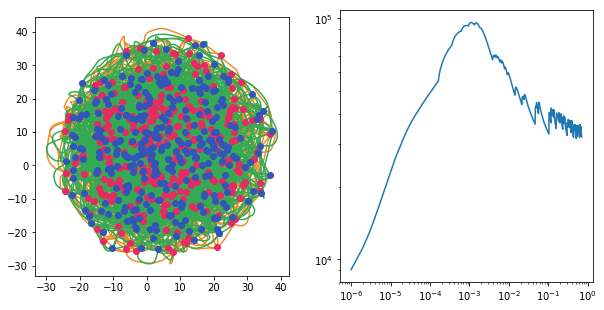


2200) ct=3.6, E-ELF-sim Has Not Converged! dlog<l>/dlog(t)~1.11 
Checks: (False, False, True)
v5 1023 ^10 187 v5 962 ^10 180 v5 940 ^5 [=] 34 ^5 [=] 29 ^5 [=] 30 ^5 [=] 28 ^5 [=] 30 2210 |ct:0.98 ^10 180 v5 990 ^10 185 v5 1001 ^10 191 ^5 [=] 36 ^5 [=] 30 ^5 [=] 32 ^5 [=] 34 ^5 [=] 34 2251 |ct:1.7 v5 1000 ^10 186 v5 985 ^10 183 v5 989 ^5 [=] 32 ^5 [=] 35 ^5 [=] 29 ^5 [=] 35 ^5 [=] 34 2293 |ct:1.9 ^10 189 v5 1019 ^10 199 v5 1032 ^10 189 ^5 [=] 34 ^5 [=] 34 ^5 [=] 33 ^5 [=] 34 ^5 [=] 31 2335 |ct:4.3 v5 1025 ^10 181 v5 967 ^10 177 v5 970 ^5 [=] 32 ^5 [=] 28 ^5 [=] 34 ^5 [=] 30 ^5 [=] 29 2376 |ct:0.62 dt(s) = 68.1


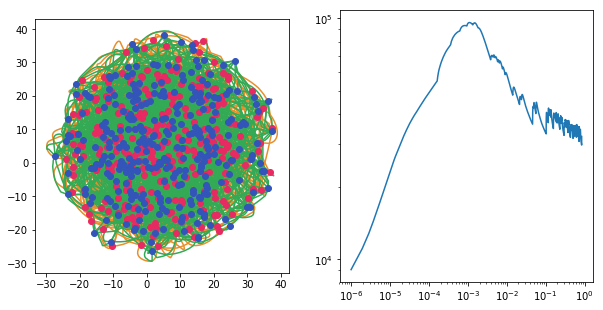


2400) ct=0.62, E-ELF-sim Has Not Converged! dlog<l>/dlog(t)~1.66 
Checks: (False, False, True)
^10 185 v5 1010 ^10 194 v5 1006 ^10 181 ^5 [=] 29 ^5 [=] 36 ^5 [=] 33 ^5 [=] 35 ^5 [=] 36 2417 |ct:0.16 

KeyboardInterrupt: 

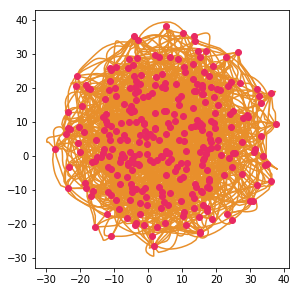

In [12]:
c0 = 0.5
tol = c0/5
n3.iter_converge(nn,
                 max_its = 60000, # maximum iterations
                 its = 200, # # of iterations before plotting and checking convergence conditions
                 c0 = c0, # 0.5, decrease if too many fluctuations in plot maybe to c0=.1 , increse if too slow, but not more than c0=1 
                 tol = tol, # threshold for convergence check. increase if it doesn't converge soon enough, but not more than c0
                 ellipsoid = 0 # set to true to resolve broken links 
                )

^5 [=] 47 ^5 [=] 106 ^5 [=] 107 ^5 [=] 109 ^5 [=] 108 41 |ct:0.5 ^5 [=] 104 ^5 [=] 222 ^5 [=] 232 ^5 [=] 226 ^5 [=] 223 81 |ct:0.5 ^5 [=] 225 ^5 [=] 312 ^5 [=] 309 ^5 [=] 311 ^5 [=] 309 121 |ct:0.5 ^5 [=] 308 ^5 [=] 387 ^5 [=] 385 ^5 [=] 386 ^5 [=] 391 162 |ct:0.5 dt(s) = 44


/home/nidami/tf3_gpu/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


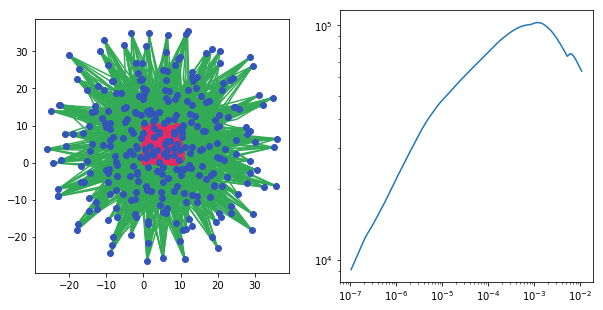

Beginning convergence check ...
^5 [=] 387 ^5 [=] 493 ^5 [=] 487 ^5 [=] 491 ^5 [=] 490 202 |ct:0.051 ^5 [=] 496 ^5 [=] 504 ^5 [=] 516 ^5 [=] 495 ^5 [=] 508 243 |ct:0.7 ^5 [=] 510 ^5 [=] 648 ^5 [=] 641 ^5 [=] 648 ^5 [=] 644 284 |ct:6.2 ^5 [=] 640 ^5 [=] 869 v5 876 ^10 204 ^5 [=] 860 325 |ct:0.93 ^5 [=] 864 v5 932 ^10 218 v5 960 ^10 213 366 |ct:1.1 dt(s) = 82.6


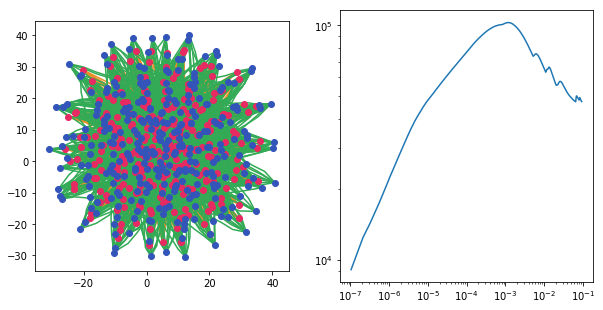


400) ct=1.1, E-ELF-sim Has Not Converged! dlog<l>/dlog(t)~-0.0696 
Checks: (False, True, True)
v5 949 ^10 226 v5 1009 ^10 216 v5 993 407 |ct:0.82 ^10 226 v5 1123 ^10 236 v5 1121 ^10 234 447 |ct:0.69 v5 1126 ^10 233 v5 1148 ^10 241 v5 1136 488 |ct:3.4 ^10 244 v5 1346 ^10 259 v5 1330 ^10 260 529 |ct:4 v5 1336 ^10 261 v5 1362 ^10 260 v5 1362 570 |ct:1.5 dt(s) = 81.6


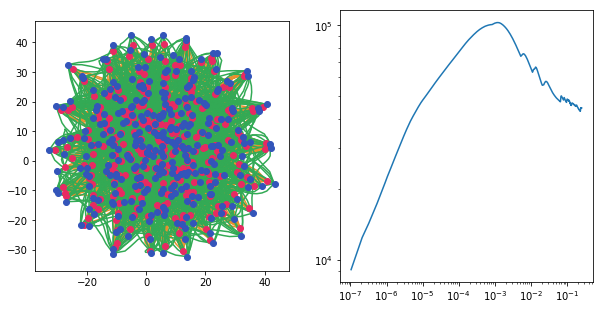


600) ct=1.5, E-ELF-sim Has Not Converged! dlog<l>/dlog(t)~-0.0553 
Checks: (False, True, True)
^10 259 v5 1460 ^10 274 v5 1499 ^10 268 610 |ct:1.4 v5 1502 ^10 277 v5 1492 ^10 272 v5 1494 651 |ct:4.5 ^10 275 v5 1657 ^10 300 v5 1654 ^10 307 691 |ct:1.7 v5 1620 ^10 305 v5 1633 ^10 293 v5 1613 732 |ct:1.6 ^10 294 v5 1699 ^10 303 v5 1708 ^10 308 773 |ct:2.2 dt(s) = 114


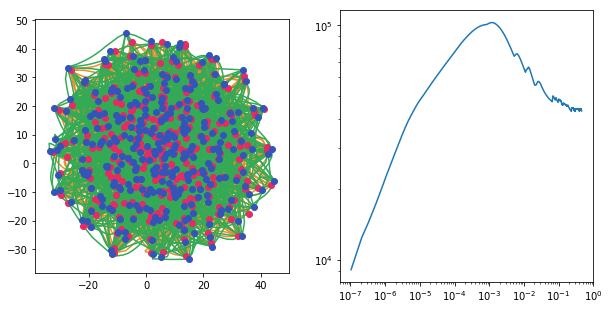


800) ct=2.2, E-ELF-sim Has Not Converged! dlog<l>/dlog(t)~-0.0723 
Checks: (False, True, True)
v5 1709 ^10 315 v5 1664 ^10 311 v5 1678 814 |ct:2 ^10 310 v5 1741 ^10 316 v5 1746 ^10 312 854 |ct:2.2 v5 1753 ^10 314 v5 1730 ^10 312 v5 1741 895 |ct:0.88 ^10 305 v5 1791 ^10 323 v5 1785 ^10 326 935 |ct:2 v5 1773 ^10 332 v5 1728 ^10 332 v5 1748 976 |ct:1.9 dt(s) = 114


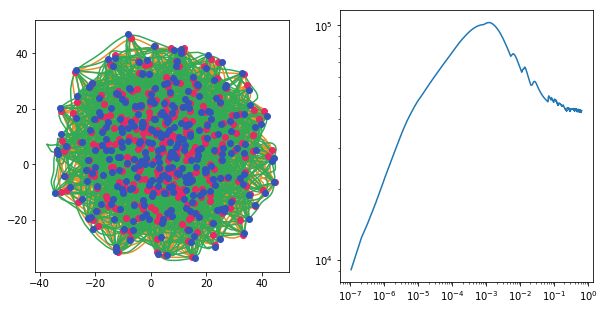


1000) ct=1.9, E-ELF-sim Converged! dlog<l>/dlog(t)~0.00745 
Checks: (False, False, True)


In [7]:
c0 = 0.5
tol = c0/5
n3.iter_converge(nn,
                 max_its = 60000, # maximum iterations
                 its = 200, # # of iterations before plotting and checking convergence conditions
                 c0 = c0, # 0.5, decrease if too many fluctuations in plot maybe to c0=.1 , increse if too slow, but not more than c0=1 
                 tol = tol, # threshold for convergence check. increase if it doesn't converge soon enough, but not more than c0
                 ellipsoid = 0 # set to true to resolve broken links 
                )